In [167]:
from __future__ import division
import numpy as np
import pandas as pd
import scipy.stats as st
import itertools
import math
from collections import Counter, defaultdict, OrderedDict
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import matplotlib.pylab as plt
import matplotlib as mpl
plt.rcParams['figure.figsize'] = (12.0, 6.0)
#%matplotlib notebook
%matplotlib inline
%load_ext base16_mplrc
%base16_mplrc light default

The base16_mplrc extension is already loaded. To reload it, use:
  %reload_ext base16_mplrc
Setting plotting theme to default-light. Palette available in b16_colors


In [7]:
import cPickle as pickle
from fuzzywuzzy import fuzz, process
from fenaroli_parser.recipe_weights import compute_all_weights, match_ingredients, compute_single_avg_weight

In [8]:
from itertools import permutations, combinations
from fenaroli_parser.recipe_weights import compute_single_avg_weight, match_ingredients

In [219]:
from statsmodels.regression.linear_model import OLS

## comparing recipe weights to null model

In [41]:
with open('./comb_recipes.pkl', 'r') as f:
    comb_rec = pickle.load(f)

In [9]:
with open('./new_avg_recipe_weights.pkl', 'r') as f:
    avg_recipe = pickle.load(f)
with open('./new_avg_random_weights.pkl', 'r') as f:
    avg_random = pickle.load(f)

In [10]:
sorted(avg_recipe.values(), reverse = True)[:20]

sorted(avg_random.values(), reverse = True)[:20]

[178.0,
 178.0,
 177.0,
 177.0,
 177.0,
 177.0,
 177.0,
 177.0,
 170.0,
 170.0,
 161.0,
 161.0,
 161.0,
 161.0,
 161.0,
 161.0,
 155.0,
 155.0,
 155.0,
 155.0]

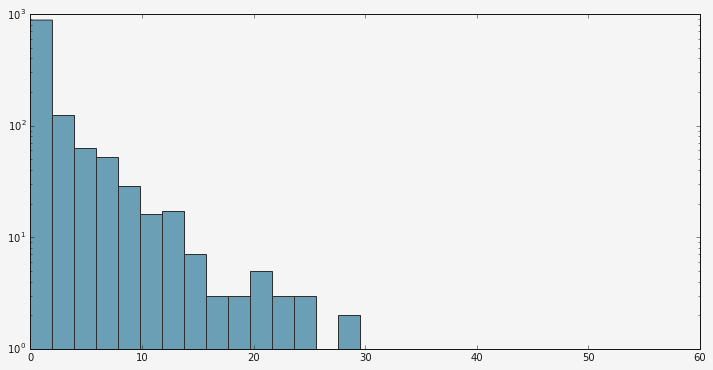

In [11]:
_ = plt.hist(avg_recipe.values(), bins = 30, log=True)

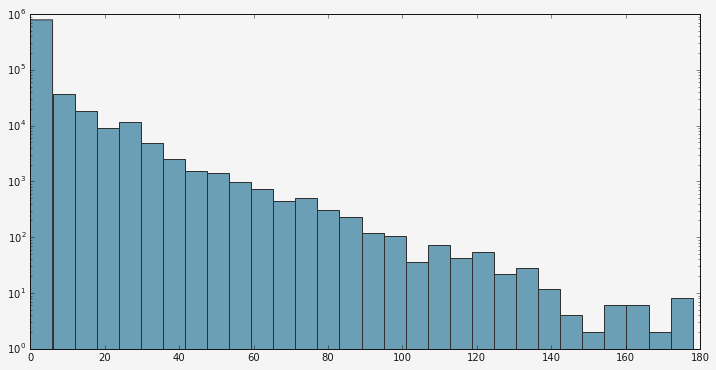

In [12]:
_ = plt.hist(avg_random.values(), bins = 30, log=True)

In [13]:
avg_random.keys()[:5]

[u'half and half, mango syrup',
 u'star anise, edible pansy',
 u'grenadine, evaporated milk',
 u'tamarind, vanilla cognac',
 u'honey, chardonnay']

In [57]:
rand_weights = pd.Series(avg_random.values())
rand_keys = pd.Series(avg_random.keys())
bin_indices = pd.cut(rand_weights, 180)

In [58]:
bin_indices[:5]

0     (-0.178, 0.989]
1     (-0.178, 0.989]
2     (-0.178, 0.989]
3    (19.778, 20.767]
4     (-0.178, 0.989]
dtype: category
Categories (180, object): [(-0.178, 0.989] < (0.989, 1.978] < (1.978, 2.967] < (2.967, 3.956] ... (174.0444, 175.0333] < (175.0333, 176.0222] < (176.0222, 177.0111] < (177.0111, 178]]

In [55]:
ti1 = rand_keys[3]
ti1

u'tamarind, vanilla cognac'

In [106]:
bin_lookup = pd.concat([rand_keys, bin_indices], axis =1 )
bin_lookup.columns =['pair', 'bin']
bin_lookup = bin_lookup.set_index('pair')
# bin_lookup

In [117]:
bin_dict = bin_lookup['bin'].to_dict()

In [164]:
bin_dict

{u'half and half, mango syrup': '(-0.178, 0.989]',
 u'star anise, edible pansy': '(-0.178, 0.989]',
 u'grenadine, evaporated milk': '(-0.178, 0.989]',
 u'honey, chardonnay': '(-0.178, 0.989]',
 u'beer,, coconut water with tangerine': '(4.944, 5.933]',
 u'orange twist, sugar syrup': '(-0.178, 0.989]',
 u'amaro montenegro, tomato': '(3.956, 4.944]',
 u'scaldis p\xe3\xaache mel beer, cocoa powder': '(10.878, 11.867]',
 u'chocolate milk, cardamaro amaro': '(-0.178, 0.989]',
 u'kiwi, bittermen\u2019s mol\xe9 bitters': '(10.878, 11.867]',
 u'tangerine juice, thai basil': '(-0.178, 0.989]',
 u'shelled raw pistachios, peach shrub': '(-0.178, 0.989]',
 u'pickled peppers, strawberrry-infused aperol': '(6.922, 7.911]',
 u'pumpkin beer, a\xe7a\xed sugar': '(4.944, 5.933]',
 u"regan's orange bitters no. 6, baileys with a hint of caramel": '(-0.178, 0.989]',
 u'purely syrup grapefruit, ancho chile powder': '(-0.178, 0.989]',
 u'hibiscus-rosehip tea, tamarind': '(-0.178, 0.989]',
 u'strawberry syrup,

In [144]:
def null_fractions(pair_list):
    in_rec = defaultdict(int)
    tot_numb_in_bin = defaultdict(int)
    for pair in pair_list:
        ingrds = pair.split(', ')
        pair_id = ingrds[0] + ', ' + ingrds[1]
        for recipe in comb_rec.values():
            if ingrds[0] in recipe and ingrds[1] in recipe:
                in_rec[bin_dict[pair_id]] += 1
            tot_numb_in_bin[bin_dict[pair_id]] += 1
        fractions = {k: float(in_rec[k])/tot_numb_in_bin[k] for k in tot_numb_in_bin}
    return fractions

In [135]:
len(rand_keys)/2000/60

7.293

In [148]:
%prun bin_fracts= null_fractions(rand_keys)

In [179]:
bin_fracts

{'(-0.178, 0.989]': 1.621912846110495e-05,
 '(0.989, 1.978]': 0.0,
 '(10.878, 11.867]': 2.058666377205697e-05,
 '(100.867, 101.856]': 0.0,
 '(101.856, 102.844]': 0.0,
 '(102.844, 103.833]': 0.0,
 '(103.833, 104.822]': 0.0,
 '(105.811, 106.8]': 0.0,
 '(106.8, 107.789]': 0.0,
 '(107.789, 108.778]': 0.0,
 '(108.778, 109.767]': 0.0,
 '(109.767, 110.756]': 0.0,
 '(11.867, 12.856]': 9.728523743362985e-06,
 '(110.756, 111.744]': 0.0,
 '(111.744, 112.733]': 0.0,
 '(112.733, 113.722]': 0.0002355435166647038,
 '(113.722, 114.711]': 0.0002748007694421544,
 '(114.711, 115.7]': 0.0,
 '(115.7, 116.689]': 0.0,
 '(116.689, 117.678]': 0.0,
 '(117.678, 118.667]': 0.0,
 '(119.656, 120.644]': 0.0,
 '(12.856, 13.844]': 1.0162123985534217e-05,
 '(120.644, 121.633]': 0.0,
 '(121.633, 122.622]': 0.0,
 '(123.611, 124.6]': 0.0,
 '(125.589, 126.578]': 0.00032976092333058534,
 '(127.567, 128.556]': 0.0,
 '(129.544, 130.533]': 0.0,
 '(13.844, 14.833]': 5.51943115738959e-06,
 '(133.5, 134.489]': 0.0,
 '(134.489, 13

In [190]:
def compute_bin_center(bin_id):    
    b_center = bin_id.split('(')[1].split(', ')
    b_center = ((float(b_center[0]) + float(b_center[1].split(']')[0])))/2
    return b_center

In [202]:
bd = {compute_bin_center(k):v for k,v in bin_fracts.iteritems()}
ordered_bins = sorted(bd.items(), key=lambda t: t[0])

In [211]:
ordered_bins[:10]

[(0.40549999999999997, 1.621912846110495e-05),
 (1.4835, 0.0),
 (3.4615, 2.8227105529555752e-05),
 (4.45, 1.816195361078436e-05),
 (5.4384999999999994, 9.66323846788539e-06),
 (6.4275, 2.6935479811416315e-05),
 (7.416499999999999, 1.3762653160399459e-05),
 (8.4055, 1.298078500929963e-05),
 (9.3945, 2.040996006050953e-05),
 (10.3835, 1.6159470271018557e-05)]

(0, 0.0001)

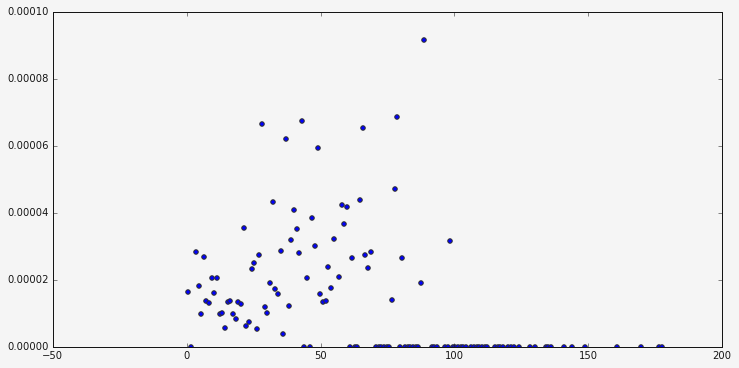

In [216]:
xns = [i[0] for i in ordered_bins]
yb = [i[1] for i in ordered_bins]
plt.scatter(xns, yb)
plt.ylim((0, 1*10**(-4)))

In [224]:
lin_reg = OLS(yb, xns)
results = lin_reg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     27.71
Date:                Thu, 07 Jan 2016   Prob (F-statistic):           5.45e-07
Time:                        15:07:36   Log-Likelihood:                 1110.3
No. Observations:                 135   AIC:                            -2219.
Df Residuals:                     134   BIC:                            -2216.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          3.589e-07   6.82e-08      5.264      0.000    2.24e-07    4.94e-07
==============================================================================
Omnibus:                       96.228   Durbin-Watson:                   1.587
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              509.694
Skew:                           2.695   Prob(JB):                    2.10e-111
Kurtosis:                      10.845   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""